<a href="https://colab.research.google.com/github/ahmedmoustafa/datasets/blob/main/obesity/obesity_r_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Obesity Dataset

First off, we're going to load the necessary packages. If any of them aren't installed yet, they'll be automatically installed for us.

In [1]:
if (!require("ggplot2")) install.package("ggplot2")
library(ggplot2)
theme_set(theme_light()) # Set the default ggplot theme to the light theme

Loading required package: ggplot2



Loading our data now, and we'll set it to automatically convert text columns to factors. Saves us the hassle of doing each one individually.

In [2]:
df = read.csv ("https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/obesity/obesity.csv", stringsAsFactors = TRUE)
head(df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
2,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
4,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
5,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
6,Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight


Now let's check out the stats summary for our numeric columns and see the breakdowns and counts for the categorical ones.

In [3]:
summary(df)

    Gender          Age            Height          Weight      
 Female:1043   Min.   :14.00   Min.   :1.450   Min.   : 39.00  
 Male  :1068   1st Qu.:19.95   1st Qu.:1.630   1st Qu.: 65.47  
               Median :22.78   Median :1.700   Median : 83.00  
               Mean   :24.31   Mean   :1.702   Mean   : 86.59  
               3rd Qu.:26.00   3rd Qu.:1.768   3rd Qu.:107.43  
               Max.   :61.00   Max.   :1.980   Max.   :173.00  
                                                               
 family_history_with_overweight  FAVC           FCVC            NCP       
 no : 385                       no : 245   Min.   :1.000   Min.   :1.000  
 yes:1726                       yes:1866   1st Qu.:2.000   1st Qu.:2.659  
                                           Median :2.386   Median :3.000  
                                           Mean   :2.419   Mean   :2.686  
                                           3rd Qu.:3.000   3rd Qu.:3.000  
                                      

## Univariate Analysis

### How is gender distributed in the dataset?

In [4]:
table(df$Gender)


Female   Male 
  1043   1068 

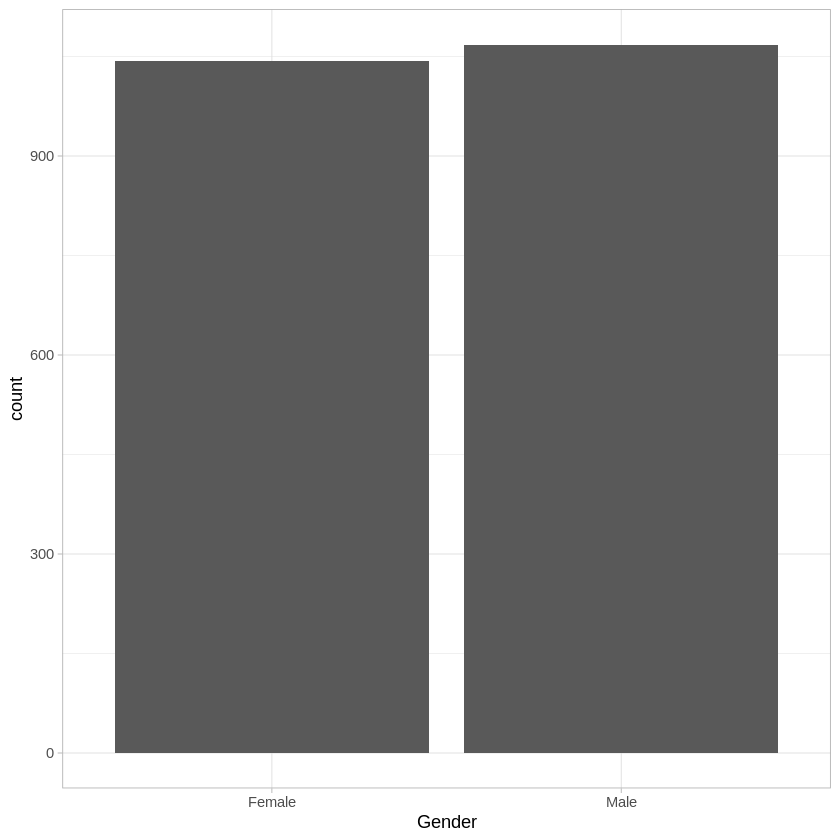

In [5]:
ggplot(df) +
  geom_bar(aes(x = Gender))

### What are the mean, median, and standard deviation of the age of participants?

In [6]:
mean(df$Age)

[1] 24.3126

In [7]:
median(df$Age)

[1] 22.77789

In [8]:
sd(df$Age)

[1] 6.345968

### Create a histogram to analyze the distribution of weight in the dataset. Add appropriate bin sizes and titles.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


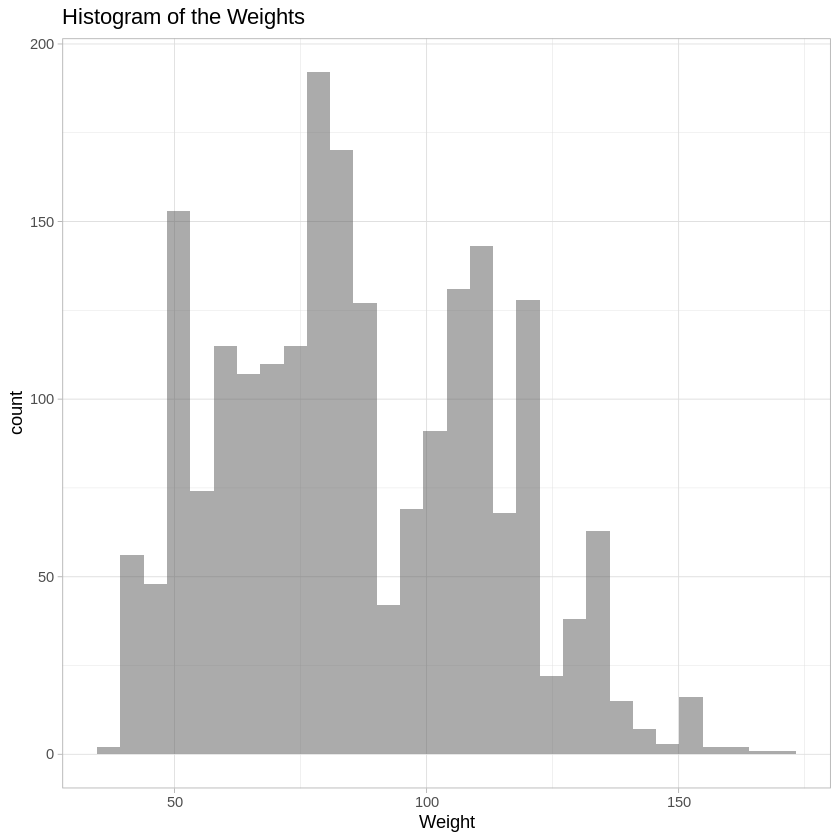

In [9]:
ggplot(df) +
  geom_histogram(aes(x = Weight), alpha = 0.5) +
  ggtitle ("Histogram of the Weights")

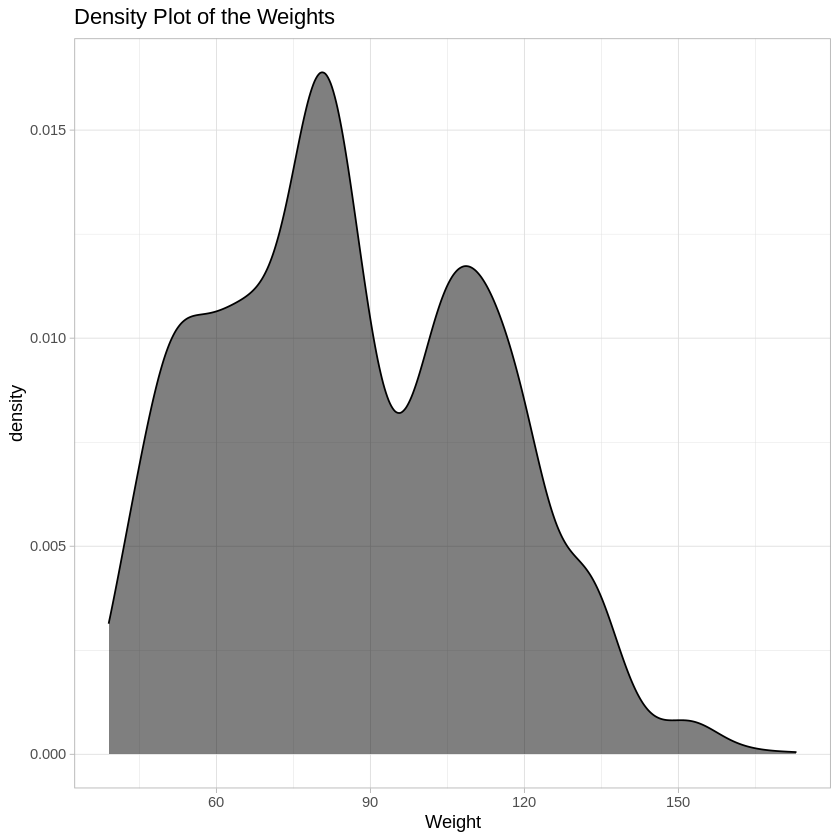

In [10]:
ggplot(df) +
  geom_density(aes(x = Weight), fill = "black", alpha = 0.5) +
  ggtitle ("Density Plot of the Weights")

### What is the proportion of each obesity level in the dataset?

In [11]:
table(df$NObeyesdad)


Insufficient_Weight       Normal_Weight      Obesity_Type_I     Obesity_Type_II 
                272                 287                 351                 297 
   Obesity_Type_III  Overweight_Level_I Overweight_Level_II 
                324                 290                 290 

In [12]:
round(100 * table(df$NObeyesdad)/nrow(df), 2)


Insufficient_Weight       Normal_Weight      Obesity_Type_I     Obesity_Type_II 
              12.88               13.60               16.63               14.07 
   Obesity_Type_III  Overweight_Level_I Overweight_Level_II 
              15.35               13.74               13.74 

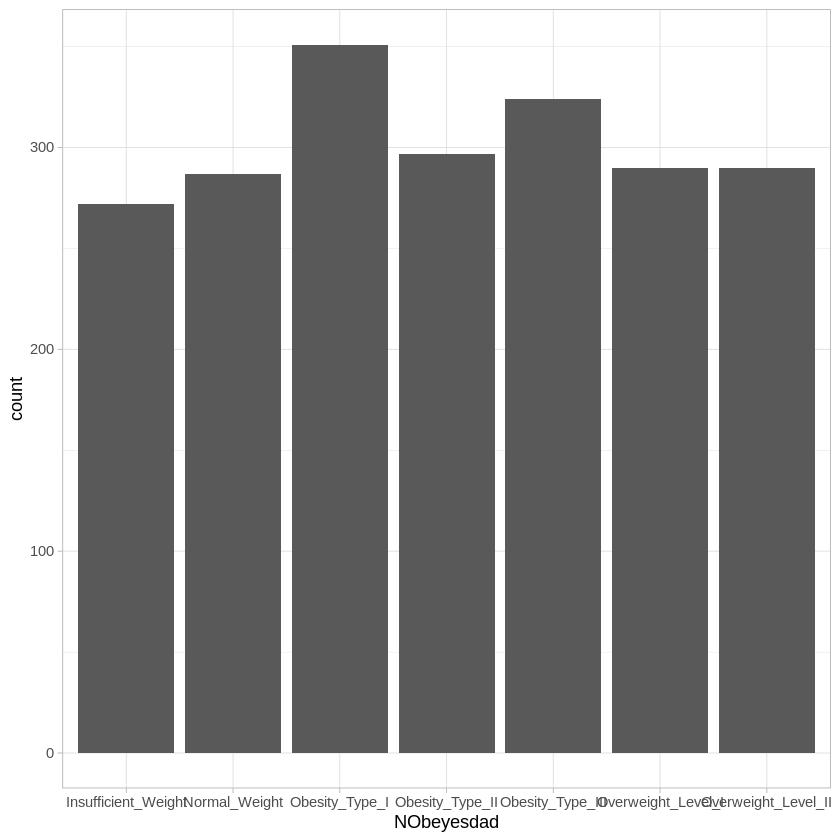

In [13]:
ggplot(df) +
  geom_bar(aes(x = NObeyesdad))

## Bivariate Analysis

### Is there a correlation between weight and height?

In [14]:
cor(df$Height, df$Weight)

[1] 0.4631361

Height and weight are both numbers, right? So, to check out how they're related, we can plot them on a scatter plot. We'll put height (our independent variable) on the x-axis and weight (the dependent variable) on the y-axis.

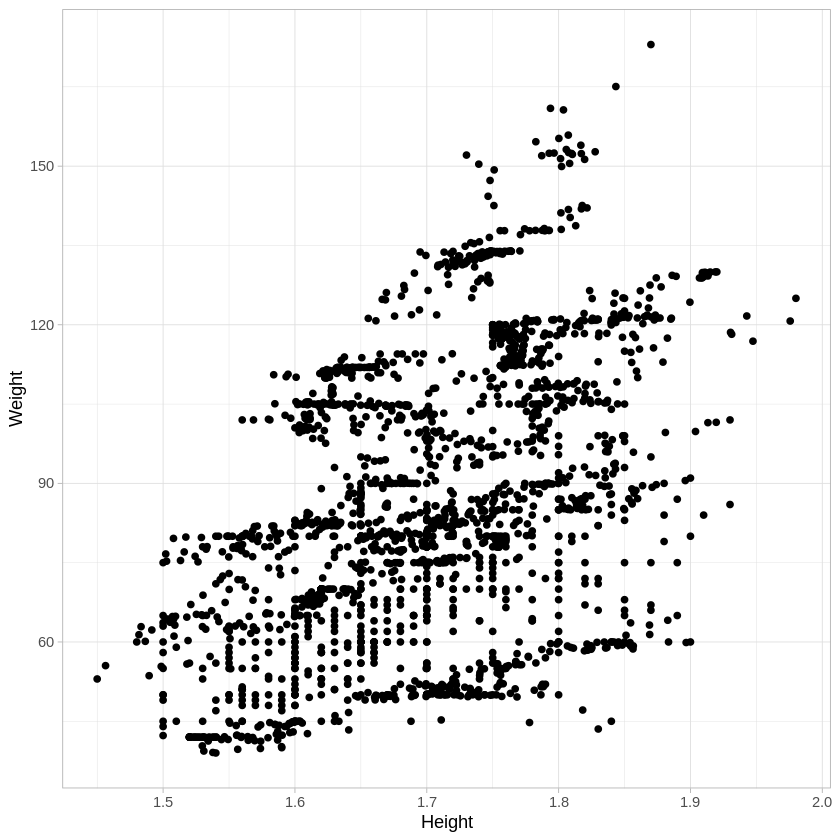

In [15]:
ggplot(df) +
  geom_point(aes(x = Height, y = Weight))

Let's add the obesity levels to our scatter plot. This will help us see how height and weight relate across different obesity categories.

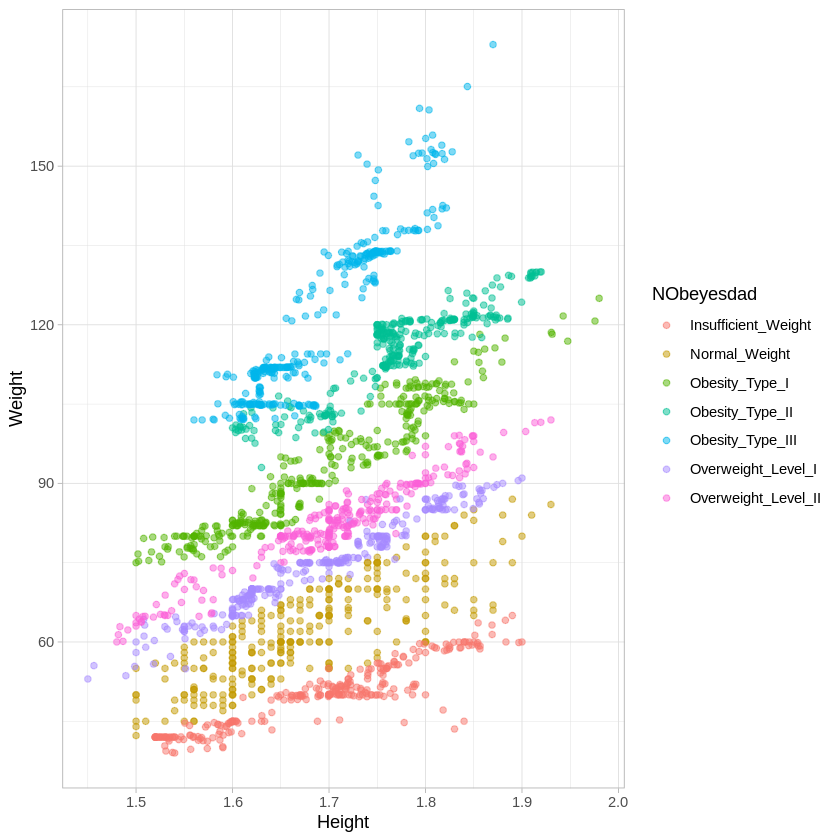

In [16]:
ggplot(df) +
  geom_point(aes(x = Height, y = Weight, color = NObeyesdad), alpha = 0.5)

Now, let's dive deeper into the correlation for each obesity level. We'll start by figuring out the correlation coefficient for just the normal-weight group and compare it to the overall correlation.

In [17]:
cor(df[df$NObeyesdad == "Normal_Weight", "Height"], df[df$NObeyesdad == "Normal_Weight", "Weight"])

[1] 0.8296194

This correlation is way more striking than our earlier look with all obesity levels mixed in. Let's see if we get a similar value with the under-weight participants.

In [18]:
cor(df[df$NObeyesdad == "Insufficient_Weight", "Height"], df[df$NObeyesdad == "Insufficient_Weight", "Weight"])

[1] 0.917854

### How does weight distribution differ between genders?

Since we're exploring how weight (a numeric variable) varies with gender (a categorical variable), we can go with a boxplot or a violin plot to see the trends.

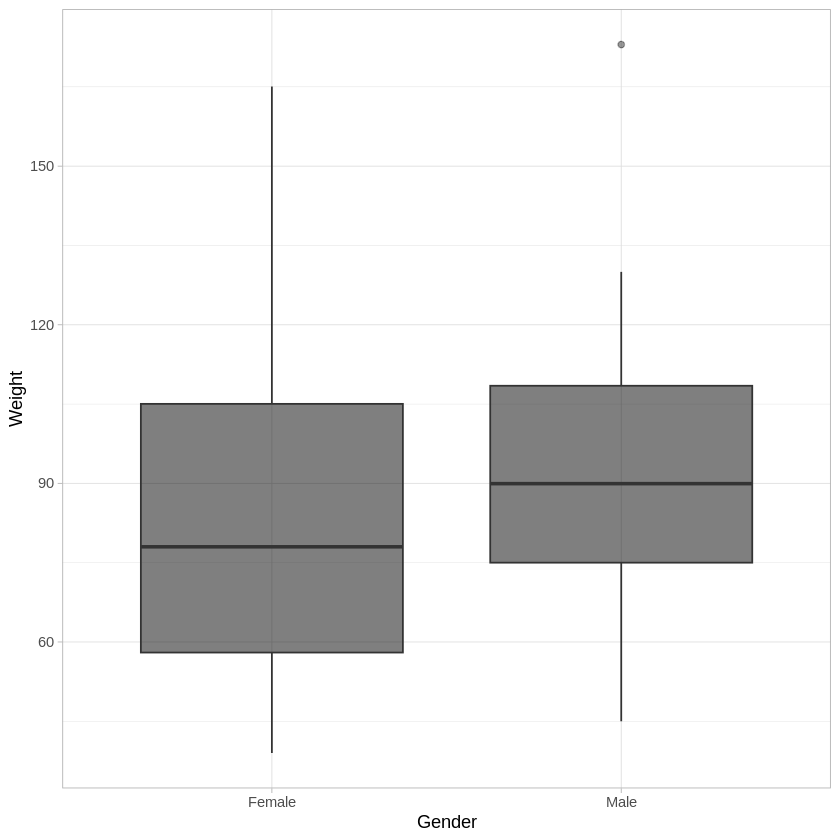

In [19]:
ggplot(df) +
  geom_boxplot(aes(x = Gender, y = Weight), fill = "black", alpha = 0.5)

From these boxplots, it looks like males tend to have a higher median weight compared to females. And, it seems like the weight distribution for females is wider, indicating a larger variance.

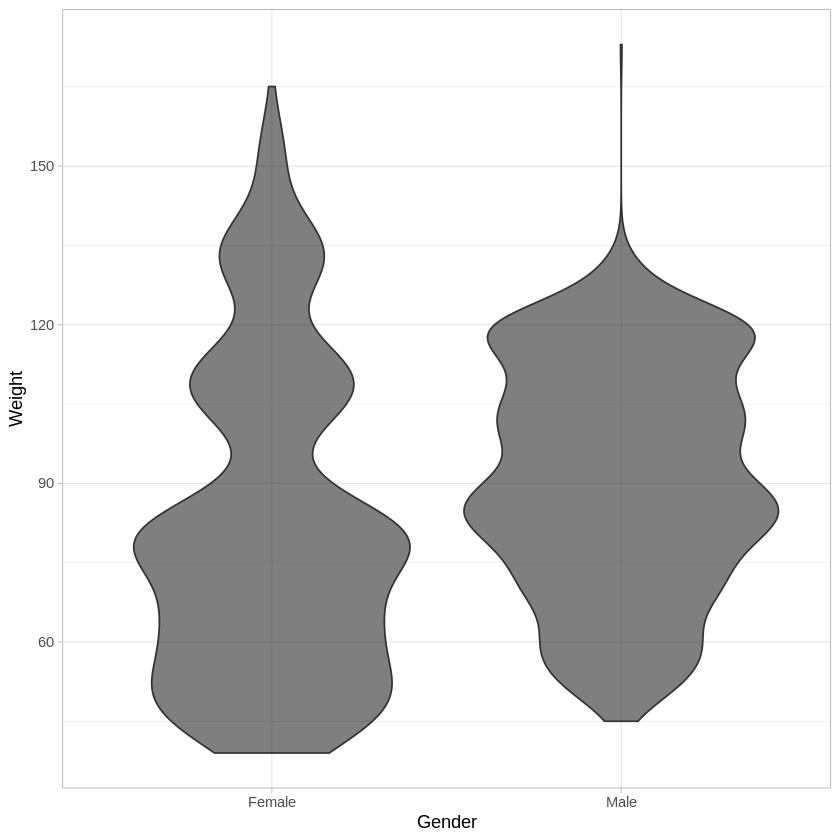

In [20]:
ggplot(df) +
  geom_violin(aes(x = Gender, y = Weight), fill = "black", alpha = 0.5)

### Analyze the relationship between physical activity frequency (`FAF`) and obesity levels.

In [21]:
summary(df$FAF)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1245  1.0000  1.0103  1.6667  3.0000 

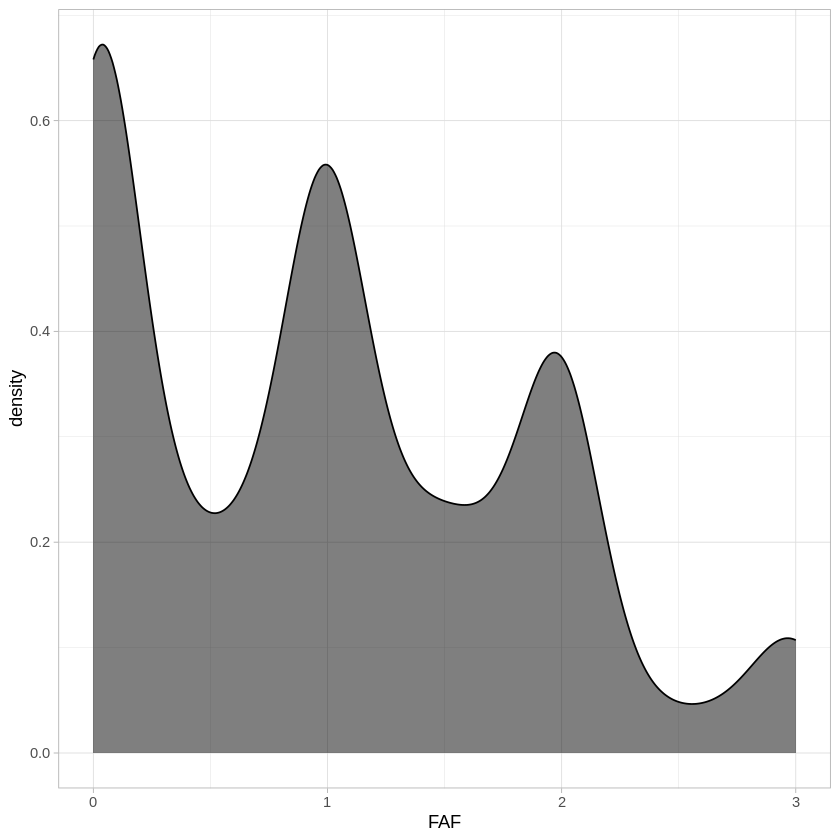

In [22]:
ggplot(df) +
  geom_density(aes(x = FAF), fill = "black", alpha = 0.5)

The distribution shown is multimodal, with four distinct peaks suggesting different groups within the data. The peaks occur near the values of 0, 1, 2 and 4 on the `FAF` axis, indicating clusters of data points around these values. The distribution's shape implies that the data may not be continuous but rather categorical in nature, with the `FAF` values representing distinct, non-overlapping groups. Given the distribution's characteristics, converting `FAF` into a categorical variable by rounding is a logical step.

In [23]:
df$FAF = factor(round(df$FAF))
table(df$FAF)


  0   1   2   3 
720 776 496 119 

Let's take a look at how often people are physically active and how that lines up with different obesity levels. We'll use a barplot for this. We’ll put physical activity frequency on the x-axis and stack the bars by obesity level. To make sure we’re comparing apples to apples, we’ll normalize the heights of the bars to the total number of people at each activity level. This way, we can compare the proportions of obesity levels within each activity category.

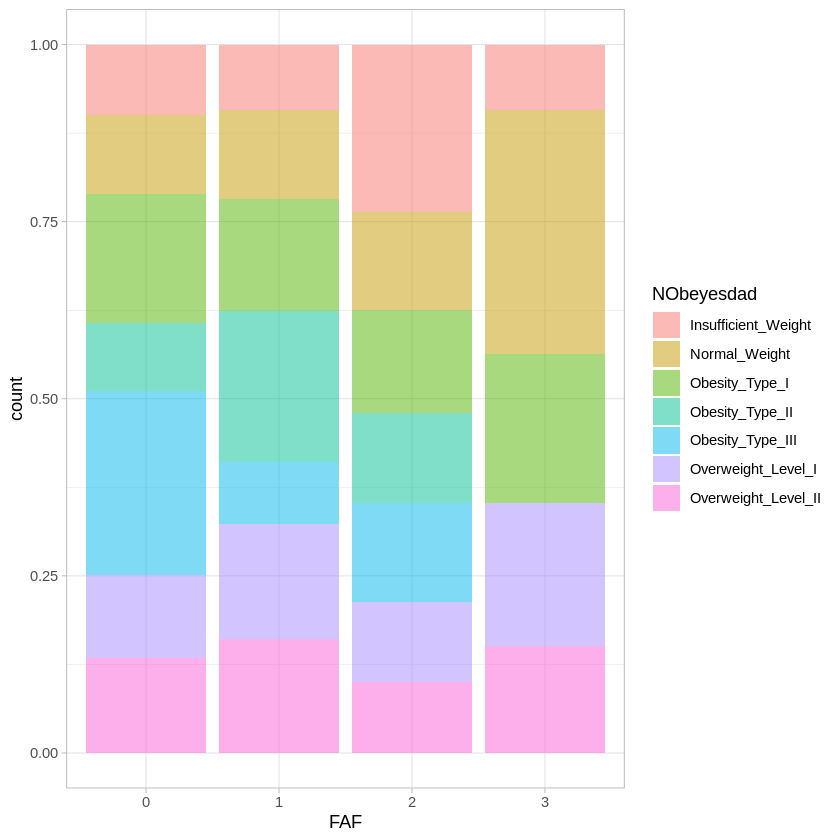

In [24]:
ggplot(df) +
  geom_bar(aes(x = FAF, fill = NObeyesdad), alpha = 0.5, position = "fill")

The above figure illustrates that participants with the lowest level of physical activity (`FAF` = $1$) have the highest proportion of Type III obesity. Conversely, the most physically active individuals (`FAF` = $3$) have no instances of Type II or Type III obesity and display the largest proportion of normal weight.


### Create a heatmap to visualize the correlations between all numerical variables in the dataset.

So, let's first identify the numerical columns within our dataset.

In [25]:
which(sapply(df, class) == "numeric")

Age Height Weight   FCVC    NCP   CH2O    TUE 
     2      3      4      7      8     11     14

Now, let's create a new data.frame that includes only the numerical columns from our dataset.

In [26]:
df2 = data.frame(Age = df$Age, Height = df$Height, Weight = df$Weight, FCVC = df$FCVC, NCP = df$NCP, CH2O = df$CH2O, TUE = df$TUE)
head(df2)

,Age,Height,Weight,FCVC,NCP,CH2O,TUE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21,1.62,64.0,2,3,2,1
2,21,1.52,56.0,3,3,3,0
3,23,1.80,77.0,2,3,2,1
4,27,1.80,87.0,3,3,2,0
5,22,1.78,89.8,2,1,2,0
6,29,1.62,53.0,2,3,2,0


Next, we will calculate the correlation coefficients for all possible pairs of numerical columns.

In [27]:
correlations = cor(df2)
correlations

,Age,Height,Weight,FCVC,NCP,CH2O,TUE
Age,1.00000000,-0.02595813,0.20256010,0.01629089,-0.04394373,-0.04530386,-0.29693059
Height,-0.02595813,1.00000000,0.46313612,-0.03812106,0.24367173,0.21337592,0.05191167
Weight,0.20256010,0.46313612,1.00000000,0.21612471,0.10746899,0.20057539,-0.07156136
FCVC,0.01629089,-0.03812106,0.21612471,1.00000000,0.04221630,0.06846147,-0.10113485
NCP,-0.04394373,0.24367173,0.10746899,0.04221630,1.00000000,0.05708800,0.03632557
CH2O,-0.04530386,0.21337592,0.20057539,0.06846147,0.05708800,1.00000000,0.01196534
TUE,-0.29693059,0.05191167,-0.07156136,-0.10113485,0.03632557,0.01196534,1.00000000


The matrix displayed above represents the correlation coefficients between each pair of numerical variables in our dataset. Noticeably, the diagonal values are all ones, indicating the correlation of each variable with itself. Additionally, the matrix is symmetric about this diagonal, meaning that the upper triangle mirrors the lower triangle.

To visualize the correlation matrix as a heatmap, we first need to 'melt' it, transforming the matrix from a wide format to a long format. For that we need the `reshape2` package.

In [28]:
if (!require("reshape2")) install.packages("reshape2")
library(reshape2)

Loading required package: reshape2



In [29]:
correlations_df = melt(correlations)
head(correlations_df)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Age,Age,1.00000000
2,Height,Age,-0.02595813
3,Weight,Age,0.20256010
4,FCVC,Age,0.01629089
5,NCP,Age,-0.04394373
6,CH2O,Age,-0.04530386


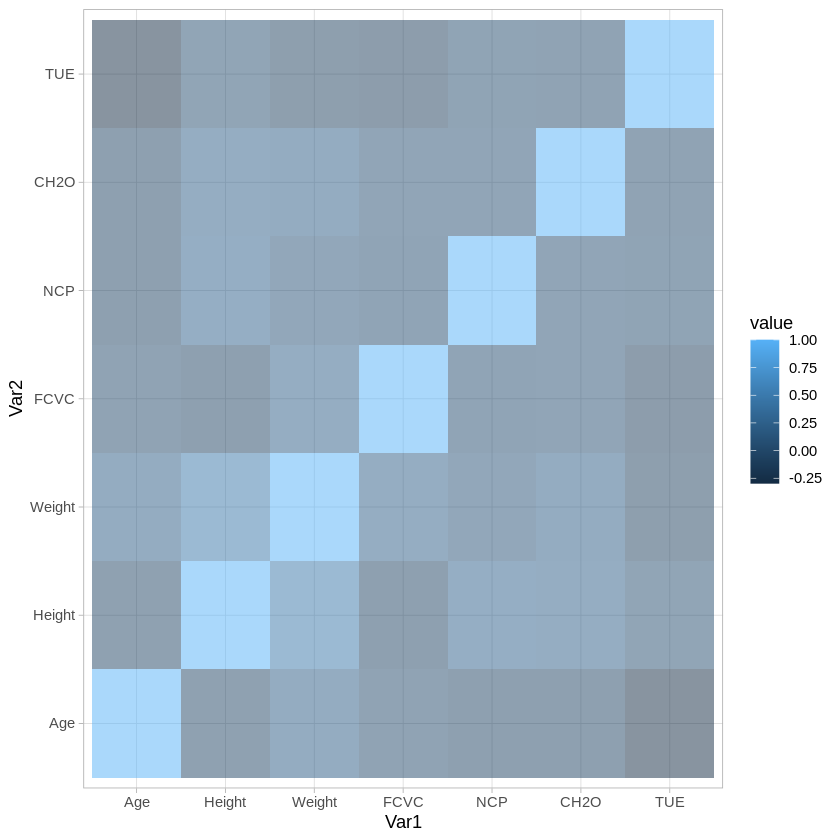

In [30]:
ggplot(correlations_df) +
  geom_tile (aes(x = Var1, y = Var2, fill = value), alpha = 0.5)

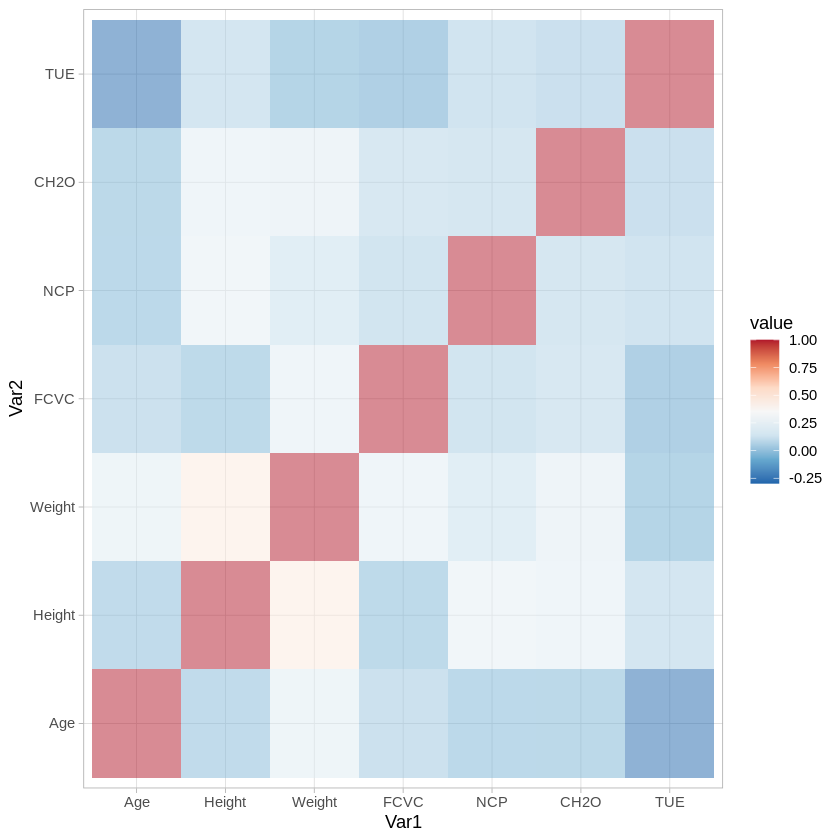

In [31]:
ggplot(correlations_df) +
  geom_tile (aes(x = Var1, y = Var2, fill = value), alpha = 0.5) +
  scale_fill_distiller(palette = "RdBu")

Perhaps it would be beneficial to remove the diagonal entries (where `Var1` equals `Var2`) from our heatmap. This can help us focus more on the correlation patterns between different variables, rather than having the visualization dominated by the 1s, which result from the variables' correlation with themselves.

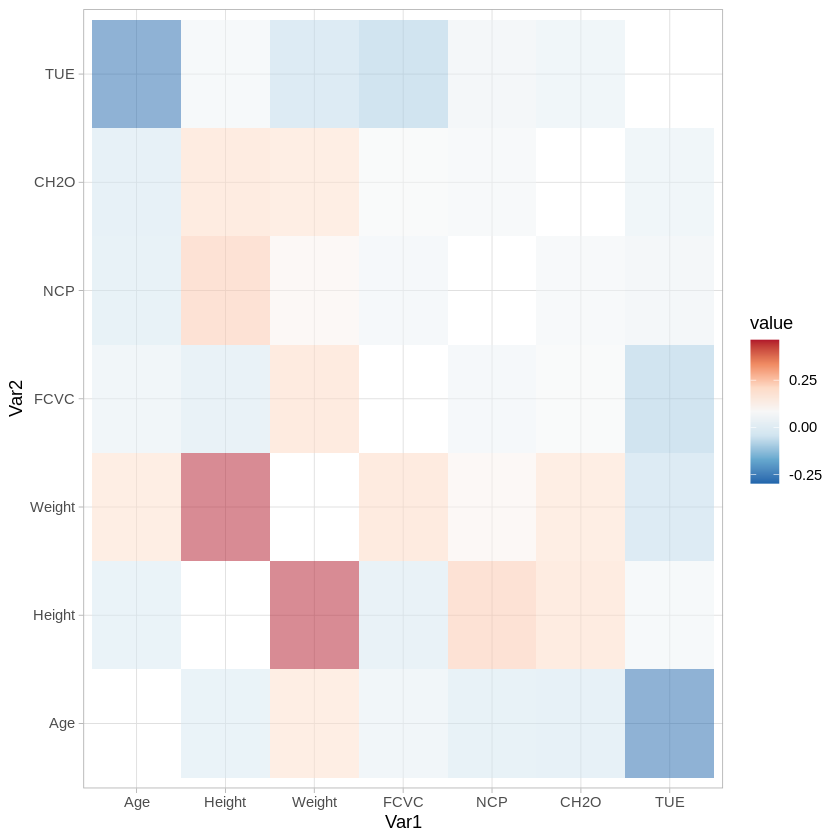

In [32]:
ggplot(correlations_df[correlations_df$Var1 != correlations_df$Var2,]) +
  geom_tile (aes(x = Var1, y = Var2, fill = value), alpha = 0.5) +
  scale_fill_distiller(palette = "RdBu")

Now, we observe that the most pronounced positive correlation exists between height and weight, as indicated by the red spectrum in the heatmap. Conversely, the strongest negative correlation is between age and time spent using technology devices (TUE). This could be interpreted as an indication that as people age, their reliance or engagement with electronic devices and gadgets tends to decrease.

We can also efficiently generate a correlation heatmap using the corrplot package in R. This package allows us to create the visualization directly from the correlation matrix, eliminating the need for melting or transforming the matrix into a data frame. This approach streamlines the process, making it straightforward to visualize the relationships between variables.

In [33]:
if (!require("corrplot")) install.packages("corrplot")
library(corrplot)

Loading required package: corrplot

corrplot 0.92 loaded



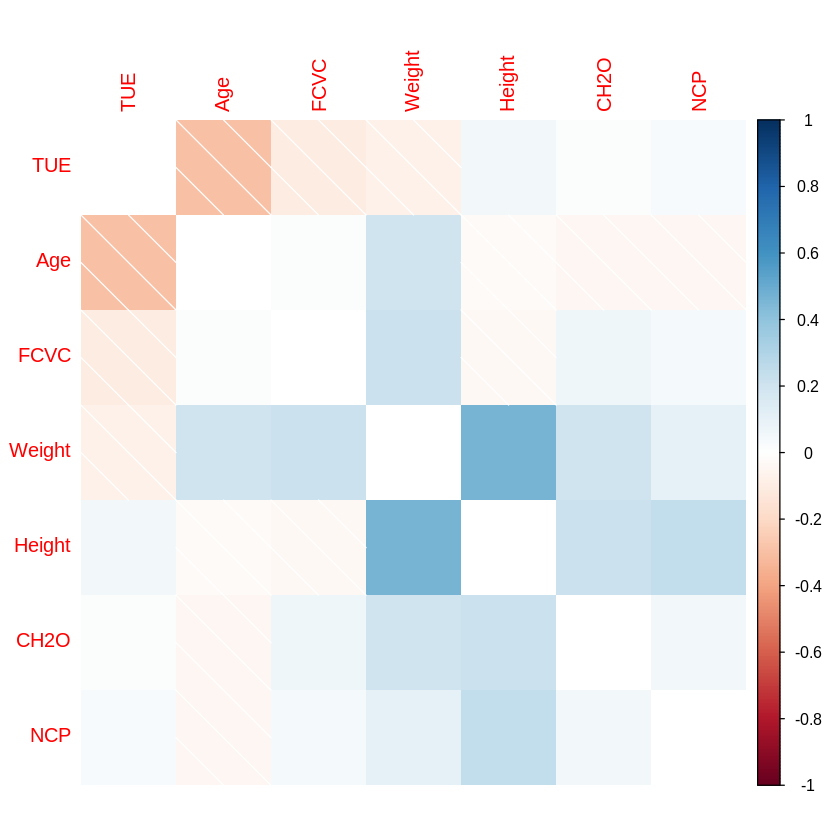

In [34]:
corrplot(correlations, method = "shade", diag = FALSE, order = "AOE")